# PCA - 100% Score with Logistic Regression

**Breast Cancer Data Analysis**


![](https://www.uicc.org/sites/main/files/styles/uicc_news_main_image/public/thumbnails/image/BCAM2016_FA.jpg?itok=zimiEGKS)

In this tutorial, based on the data we are going to find out if the cancer is benign or malignant. We would use python libraries such as Numpy, Pandas and Plotly. We would use classification techniques to predict the values (1 or 0) on our dataset. 

**Source** : https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

Let's start off by installing and import the required libraries into our code

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#Model Performance Evaluators
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

`sklearn` provides this dataset for us to work with so we are going to be using the same library for importing our dataset and loading into a dataframe with the help of `Pandas` library

In [3]:
data = load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df[df.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Exploratory Data Analysis aka EDA

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [6]:
pd.DataFrame(df.corr().unstack().sort_values().drop_duplicates())

0
target          worst concave points -0.793566
worst perimeter target               -0.782914
target          mean concave points  -0.776614
worst radius    target               -0.776454
mean perimeter  target               -0.742636
...                                        ...
                mean area             0.986507
mean radius     mean area             0.987357
worst perimeter worst radius          0.993708
mean perimeter  mean radius           0.997855
mean radius     mean radius           1.000000

[466 rows x 1 columns]

Above shown is the correlation dataframe among the features.

In [7]:
for i in df.columns:
    fig = px.histogram(df, 
                   x=i, 
                   marginal='box', 
                   text_auto=True,
                   color_discrete_sequence  = ['lightblue'],
                   template='simple_white',
                   title=i.upper() + ' Histogram')

    fig.update_layout(xaxis_title=i,yaxis_title="Count", bargap=0.1)
    
    fig.show()

In [8]:
fig = px.histogram(df, 
                   x='mean area', 
                   marginal='violin', 
                   text_auto=True,
                   color_discrete_sequence=['mediumslateblue'], 
                   template='simple_white',
                   labels={"mean area": "Mean Area"},
                   title='Cancer Mean Area Distribution')

fig.update_layout(xaxis_title="Mean Area ",yaxis_title="Count", bargap=0.1)

fig.show()

In [9]:
fig = px.scatter(df, 
                   x='mean texture', 
                   color='target',
                 size='mean texture',
                   template='simple_white', 
                   title='Cancer Mean Texture Spread',
                 labels={"mean texture": "Mean Texture", "target":"Target"},
                hover_data=["target"])

fig.update_layout(xaxis_title="Mean Texture",yaxis_title=" ")

fig.show()

In [10]:
for template in ["seaborn"]:
    fig = px.scatter(df,
                     x="mean compactness", 
                     size="mean compactness",
                     color="mean compactness",
                      labels={"mean compactness": "Mean Compactness"},
                     hover_data=["target"],
                     template=template, 
                     title="Cancer Compactness Mean")
    fig.update_layout(xaxis_title="Mean Compactness",yaxis_title=" ")
    fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)'},)
    fig.show()

In [11]:
for template in ["simple_white"]:
    fig = px.histogram(df,
                     x="worst area", 
                     color_discrete_sequence=['mediumslateblue'],
                     marginal='box',
                     text_auto=True, 
                     hover_data=["target"],
                     nbins=10,
                     template=template, 
                       labels={"worst area": "Worst Area"},
                     title="Worst Area Distribution")
    fig.update_layout(xaxis_title="worst area",yaxis_title="Count")
    fig.update_layout(bargap=0.1)
    fig.show()

In [12]:
for template in ["seaborn"]:
    fig = px.scatter(df,
                     x="symmetry error", 
                     size='symmetry error',
                     color = 'symmetry error',
                     hover_data=["target"],
                     template=template, 
                     labels={"symmetry error": "Symmetry Error"},
                     title="Symmetry Error Spread")
    fig.update_layout(xaxis_title="Symmetry Error",yaxis_title=" ")
    fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)'})
    fig.show()

In [13]:
for template in ["ggplot2"]:
    fig = px.scatter(df,
                     x="mean concave points", 
                     size='mean concave points',
                     color="mean concave points", 
                     hover_data=["target"],
                     template=template, 
                     labels={"mean concave points": "Mean Concave Points"},
                     title="Mean Concave Points Spread")
    fig.update_layout(xaxis_title="Mean concave points",yaxis_title=" ")
    fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)'}, bargap=0.1)
    fig.update_xaxes(showgrid=True)
    #fig.update_yaxes(showgrid=False)
    fig.show()

In [14]:
fig = px.histogram(df, 
                   x='target',
                   color = 'target',
                   text_auto=True,
                   color_discrete_sequence=px.colors.qualitative.G10,
                   template='simple_white',
                   labels={"target": "Target"},
                   title='Target Value Count')

fig.update_layout(bargap=0.1, xaxis_title="Target",yaxis_title="Count")

fig.show()

From our analysis above, we saw there are 357 Benign Cases and 212 Malignant breast cancer cases. Compactness Mean is more in the Malignant Cases as compared to the Benign Cases. Let us now take a look at the correlation between the independent features using a heatmap.

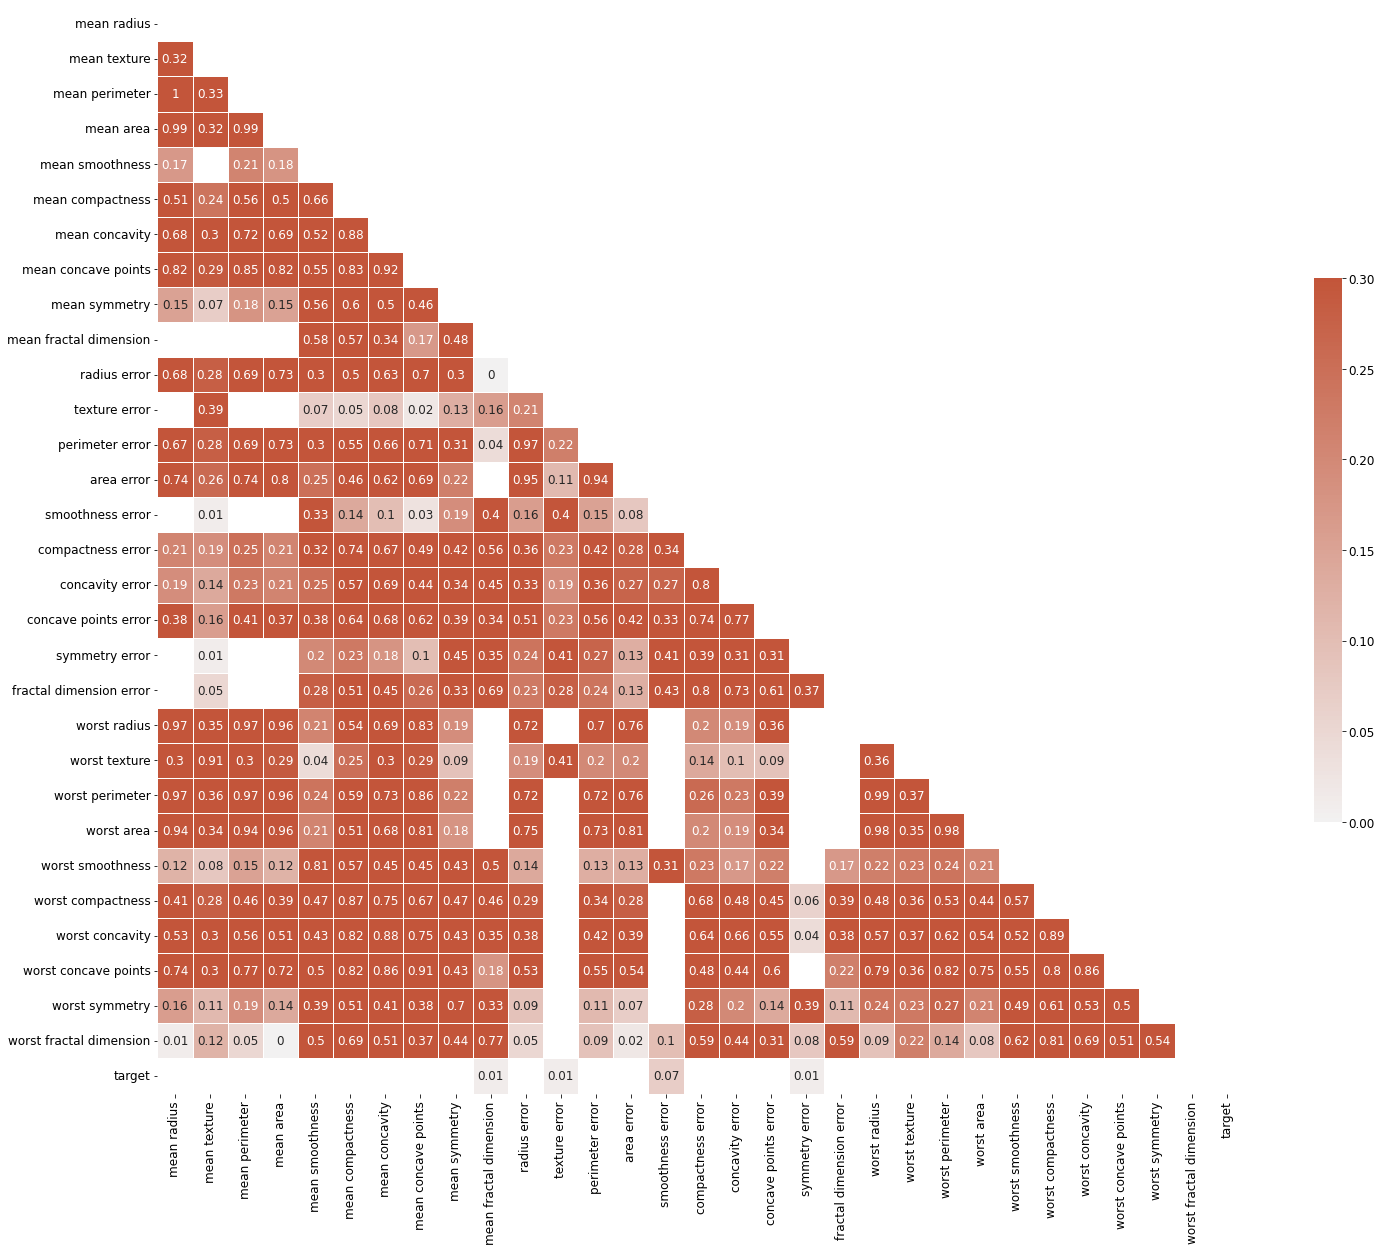

In [15]:
#Correlation Heatmap showing only those values that have a positive correlation
corr = df.corr()
corr = np.around(corr[corr > 0.0],2)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25,20))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()

## Data Pre-processing
Now, lets start processing our data and make sure its in line with the requirements of the machine learning ecosystem.

In [16]:
input_cols = df.columns[:-1]
input_cols

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [17]:
target_col =  df.columns[-1]
target_col

'target'

In [18]:
inputs_df = df[list(input_cols)].copy()
inputs_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [19]:
targets = df[(target_col)]
targets

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

### Data Scaling

Normalization and Standardization are the two main methods for the scaling of the data. Which are widely used in the algorithms where scaling is required. Both of them can be implemented by the scikit-learn libraries preprocess package.

Since we have a high dimensionality data, scaling the data will help us with the Principal Component Analysis which we will take a look at next.

In [20]:
scaler = StandardScaler()
scaler.fit(inputs_df[input_cols])
inputs_df[input_cols] = scaler.transform(inputs_df[input_cols])
inputs_df[input_cols]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


## Principal Component Analysis (PCA)
Principal Component Analysis is a way to reduce the number of variables while maintaining the majority of the important information. It transforms a number of variables that may be correlated into a smaller number of uncorrelated variables, known as principal components.

The main objective of PCA is to simplify your model features into fewer components to help visualize patterns in your data and to help your model run faster. Using PCA also reduces the chance of overfitting your model by eliminating features with high correlation.

![](https://qph.cf2.quoracdn.net/main-qimg-9a0de236de04a06bcdb6161861457f39.webp)

### Creating Covariance Matrix and finding Eigenvalues and Eigen Vectors

An **eigenvector** (eigen is German for "typical"; we could translate eigenvector to "characteristic vector") is a special vector `v` such that when it is transformed by some matrix (let's say `A`), the product  has the exact same direction as `v`. An **eigenvalue** is a scalar (traditionally represented as `lambda`) that simply scales the eigenvector `v` such that the following equation is satisfied: `Av = lambda*v`

In [21]:
#Extracting input values
column_values = []
for i in range(len(inputs_df.columns)):
    column_values.append(inputs_df.iloc[:,i].values)
    
#Making Covariance Matrix
covariance_matrix = np.cov(column_values)

#Getting the EigenVectors and the EigenValues
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [22]:
#First Element of the Covariance Matrix
covariance_matrix[0]

array([ 1.00176056,  0.32435193,  0.99961207,  0.98909547,  0.17088151,
        0.50701464,  0.67795504,  0.82397664,  0.14800135, -0.31217947,
        0.68028597, -0.09748878,  0.67535854,  0.7371592 , -0.22299203,
        0.20636266,  0.19454553,  0.37683123, -0.10450454, -0.04271634,
        0.97124591,  0.29753054,  0.9668357 ,  0.94273929,  0.11982673,
        0.41419075,  0.52783912,  0.74552443,  0.16424199,  0.00707833])

In [23]:
#First Eigenvector
eigen_vectors[0]

array([ 0.21890244, -0.23385713, -0.00853124,  0.04140896, -0.03778635,
        0.01874079,  0.12408834,  0.0074523 , -0.22310976,  0.09548644,
        0.04147149,  0.05106746,  0.01196721, -0.05950613,  0.05111877,
       -0.15058388,  0.20292425,  0.14671234, -0.22538466, -0.70241409,
        0.21146046, -0.21119401, -0.13152667,  0.1294764 ,  0.0192265 ,
       -0.18257944,  0.09855269, -0.0729289 , -0.04969866,  0.06857001])

In [24]:
print('The first eigen value is',round(eigen_values[0],4))

The first eigen value is 13.305


### Explained Variance

In [25]:
explained_variance = []
c= 0
for i in range(len((eigen_values/(np.sum(eigen_values))*100))): 
    c = c + np.around((eigen_values[i]/(np.sum(eigen_values))*100),3)
    while c < 92:
        explained_variance.append(c)
        print('At', i,'PC,', 'Explained Variance is',c)
        break

At 0 PC, Explained Variance is 44.272
At 1 PC, Explained Variance is 63.242999999999995
At 2 PC, Explained Variance is 72.636
At 3 PC, Explained Variance is 79.238
At 4 PC, Explained Variance is 84.734
At 5 PC, Explained Variance is 88.759
At 6 PC, Explained Variance is 91.01


In [26]:
print('We have been able to achieve the', np.around(explained_variance[-1],4), 'variance with just first', len(explained_variance), 'elements hence we will have', len(explained_variance), 'PCs.')

We have been able to achieve the 91.01 variance with just first 7 elements hence we will have 7 PCs.


In [27]:
fig = px.line(
              x=explained_variance, y=range(1,len(explained_variance)+1),
              template='simple_white',markers=True,
              labels = dict(y='Count of PCs', x='Explained Variance'),
              title = 'Explained Variance Plot'
                )

fig.update_layout(xaxis_title="Explained Variance",yaxis_title="Count of PCs")
    
fig.show()

### Displaying the Linear Transformations (Before and After)

In [28]:
# function to convert column of matrix to 1D vector: 
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

In [29]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

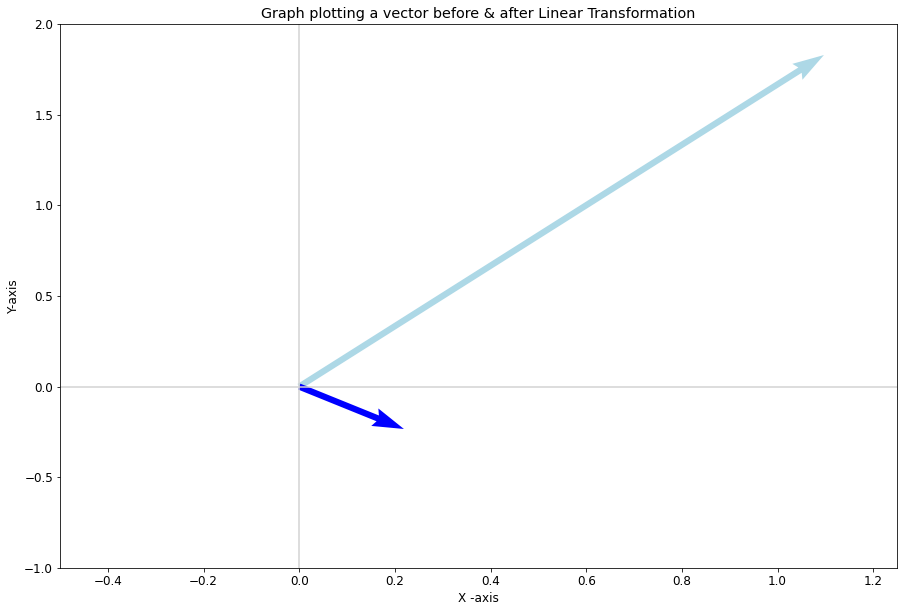

In [30]:
plot_vectors([ vectorfy(np.matrix(inputs_df),0),  eigen_vectors[0]], ['lightblue','blue'])
plt.title('Graph plotting a vector before & after Linear Transformation')
plt.xlabel('X -axis')
plt.ylabel('Y-axis')
plt.xlim(-0.5, 1.25)
_ = plt.ylim(-1, 2)

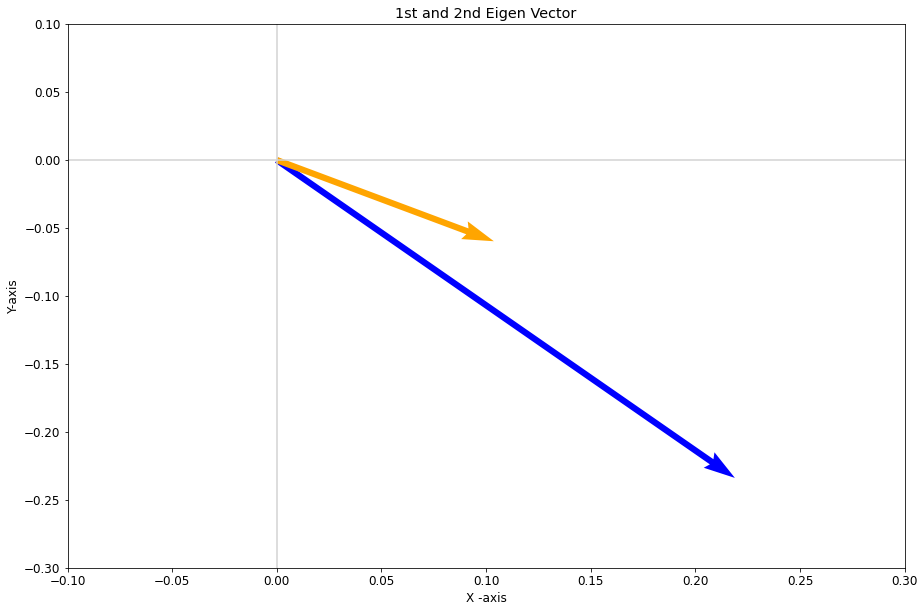

In [31]:
plot_vectors([eigen_vectors[0], eigen_vectors[1]] , ['blue', 'orange'])
plt.title('1st and 2nd Eigen Vector')
plt.xlabel('X -axis')
plt.ylabel('Y-axis')
plt.xlim(-0.1, 0.3)
_ = plt.ylim(-0.3, 0.1)

The vector shown in `lightblue` is from before the transformation and the one in darker color is the one that's received after the transformation. 

For further calculation, from all the `Eigen Vectors` we have thus received after the Linear Transformation, we have selected the one that have the tallest vectors which means the variance on the unit vector will be the highest.

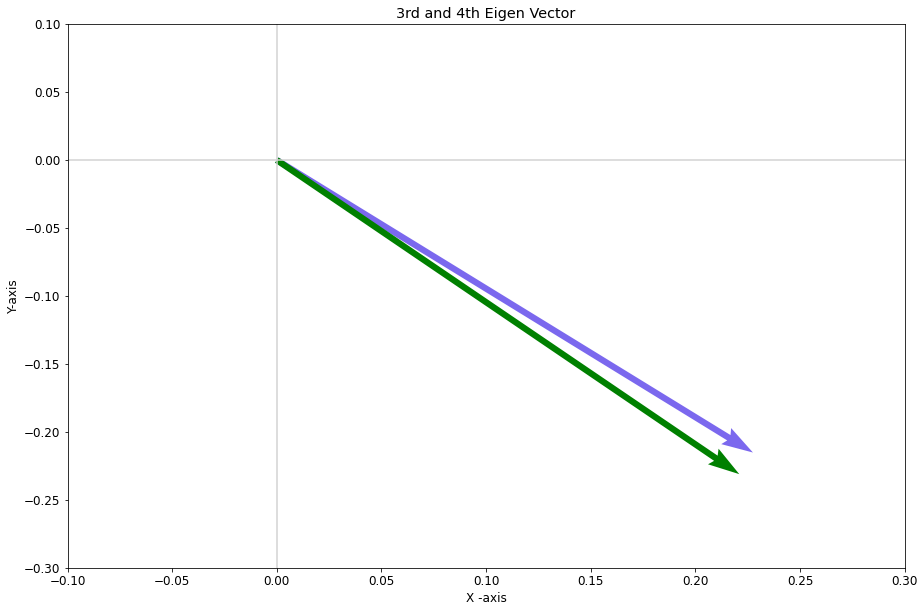

In [32]:
plot_vectors([eigen_vectors[2], eigen_vectors[3]] , ['mediumslateblue', 'green'])
plt.title('3rd and 4th Eigen Vector')
plt.xlabel('X -axis')
plt.ylabel('Y-axis')
plt.xlim(-0.1, 0.3)
_ = plt.ylim(-0.3, 0.1)

## Transforming the entire data

We have chosen 7 components since they explain the 90% of the explained variance in our data.

In [33]:
pc = eigen_vectors[0:7]
print('The Transpose of PC array')
print('                         ')
pc.T

The Transpose of PC array
                         


array([[ 2.18902444e-01,  1.03724578e-01,  2.27537293e-01,
         2.20994985e-01,  1.42589694e-01,  2.39285354e-01,
         2.58400481e-01],
       [-2.33857132e-01, -5.97060883e-02, -2.15181361e-01,
        -2.31076711e-01,  1.86113023e-01,  1.51891610e-01,
         6.01653628e-02],
       [-8.53124284e-03,  6.45499033e-02, -9.31421972e-03,
         2.86995259e-02, -1.04291904e-01, -7.40915709e-02,
         2.73383798e-03],
       [ 4.14089623e-02, -6.03050001e-01,  4.19830991e-02,
         5.34337955e-02,  1.59382765e-01,  3.17945811e-02,
         1.91227535e-02],
       [-3.77863538e-02,  4.94688505e-02, -3.73746632e-02,
        -1.03312514e-02,  3.65088528e-01, -1.17039713e-02,
        -8.63754118e-02],
       [ 1.87407904e-02, -3.21788366e-02,  1.73084449e-02,
        -1.88774796e-03, -2.86374497e-01, -1.41309489e-02,
        -9.34418089e-03],
       [ 1.24088340e-01, -1.13995382e-02,  1.14477057e-01,
         5.16534275e-02,  1.40668993e-01, -3.09184960e-02,
         1.0752044

In [34]:
transformed_df = np.dot(df.iloc[:,0:30],pc.T)
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2','PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
new_df['Target'] = df['target'].values
new_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Target
0,271.724784,-543.544450,275.519263,-594.542667,171.054272,-484.585527,1231.689730,0
1,282.467854,-742.761075,286.121543,-564.968739,254.443888,-459.531624,1177.756666,0
2,243.307595,-674.405084,248.174110,-484.893109,217.283867,-398.493682,1041.664738,0
3,69.455655,-214.537063,75.648252,-138.137464,75.122839,-127.286699,364.606019,0
4,233.291411,-733.360794,237.359754,-431.439504,225.413793,-361.458938,970.369589,0


In [35]:
new_df['Target'] = new_df['Target'].astype('str')
fig = px.scatter_3d(
                 data_frame= new_df,
                 x=new_df['PC1'],
                 y=new_df['PC2'],
                 z= new_df['PC3'],
                 template='simple_white',
                 color=new_df['Target'],
                 labels = dict(target="Target"),
                 title = 'Principal Components after Linear Transformation',
                 color_discrete_sequence=px.colors.qualitative.G10, 
                 hover_data=["PC1", "PC2", "PC3"]
                )

fig.update_layout(xaxis_title="PC1",yaxis_title="PC2")
    
fig.show()

## CLASS WEIGHT

To make the model pay more attention to the classes where there are fewer occurence of a given class in the entire data, class weights can be used. Almost all the classifiers will have the argument which will essentially take a dictionary to be passed when training the model.

The argument penalizes mistakes in samples of `class[i]` with `class_weight[i]` instead of 1. So higher class-weight means you want to put more emphasis on a class. From what you say it seems class 0 is 19 times more frequent than class 1. So you should increase the `class_weight` of class 1 relative to class 0, say {0:.1, 1:.9}. If the class_weight doesn't sum to 1, it will basically change the regularization parameter.

In the code cell just below, we are creating just a dictionary containing the classes and the class weights that will be used while training a model.

In [36]:
class_weight = {}
for i in range(len(np.unique(targets))):
    for x in [np.around((len(targets[targets==i]))/(targets.shape[0]),4)]:
        class_weight[i] = x
        
print('=== CLASS WEIGHT ===')
print(class_weight)

=== CLASS WEIGHT ===
{0: 0.3726, 1: 0.6274}


## Splitting Data
We start the process of training our data now that we are done with preprocessing of the data. Lets go ahead and split the data into 2 splits i.e. training and validation data. Training data will be used to train our model and we will validate the score on the validation data.

We have taken the test size as 0.25 since we don't want to train our model on the entire dataset and then end up having the model learn nothing when new set of data is thrown at it.

In [37]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(new_df, 
                                                                        targets, 
                                                                        test_size=0.25, 
                                                                        random_state=42)

In [38]:
print('X_train Shape -',train_inputs.shape,',', 'y_train Shape -', train_targets.shape)
print('X_test shape -', val_inputs.shape,',','y_test shape -', val_targets.shape)

X_train Shape - (426, 8) , y_train Shape - (426,)
X_test shape - (143, 8) , y_test shape - (143,)


## Training Models to find the best one

We have used the `class_weights` parameter while defining the models in the cell below.

In [39]:
names = ['Logistic Regression', "KNN", "Linear SVM","Gradient Boosting", "Decision Tree", "Random_Forest"]
classifiers = [
    LogisticRegression(solver='liblinear', class_weight=class_weight, random_state=42),
    KNeighborsClassifier(n_neighbors=3, weights= 'distance'),
    SVC(kernel="linear", C=0.025, class_weight=class_weight, random_state=42),
    GradientBoostingClassifier(n_estimators=100, random_state=42),
    DecisionTreeClassifier(max_depth=5, class_weight=class_weight, random_state=42),
    RandomForestClassifier(max_depth=5, n_estimators=100, class_weight=class_weight, random_state=42)]

In [40]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(train_inputs, train_targets)
    score = clf.score(val_inputs, val_targets)
    scores.append(score)
scores_df = pd.DataFrame()
scores_df['name'] = names
scores_df['score'] = np.around(scores,3)
scores_df.sort_values('score', ascending= False)

,name,score
0,Logistic Regression,1.000
3,Gradient Boosting,1.000
4,Decision Tree,1.000
5,Random_Forest,1.000
2,Linear SVM,0.965
1,KNN,0.930


## Model Accuracy

Let's check how well the models are able to make the predictions. We will achieve this by using `sklearn` Confusion Matrix.

![](https://i.imgur.com/UM28BCN.png%22%20width=%22480)

In [41]:
model = LogisticRegression(solver='liblinear', random_state=42,  n_jobs=-1, class_weight=class_weight)
model.fit(train_inputs, train_targets)
LRtrain_preds = model.predict(train_inputs)
confusionmatrix = np.around(confusion_matrix(train_targets, LRtrain_preds, normalize='true'),3)


#Plotting the Confusion Matrix
fig = px.imshow(confusionmatrix, 
                template='ggplot2',
                text_auto=True, 
                aspect="auto", 
                labels=dict(x="Predicted Label", y="Correct Label", color='Value'))
fig.update_xaxes(side="bottom")
fig.show()

In [42]:
count = {int(value): list(train_targets[train_targets != LRtrain_preds]).count(value) for value in set(train_targets[train_targets != LRtrain_preds])}
maxvalue = max(count, key=count.get)
#Setting the color of the most misqualified labels to 'indianred'
colors = {}
keys = range(len(np.unique(train_targets)))
for i in keys:
    for x in ['lightgray']:
        for j in ['orange']:
            colors[i] = x
            colors[maxvalue] = j
print(colors)

{0: 'orange', 1: 'lightgray'}


In [43]:
fig = px.histogram(x=train_targets[train_targets != LRtrain_preds], 
                   template='simple_white', 
                   text_auto=True,
                   color = train_targets[train_targets != LRtrain_preds],
                   labels={'x':'Image Label'},
                   color_discrete_map = colors,
                  title='Misclassified Labels Count')
fig.update_layout(
xaxis_title="Image Labels",yaxis_title=" Count")

fig.update_xaxes(ticktext=np.unique(train_targets),tickvals=np.unique(train_targets), ticklabelstep=1, 
                 type="category", categoryorder="total descending")
fig.show()

We can see that the model is making pretty good classification.

**Logistic Regression Classification Report**

In [44]:
print(classification_report(train_targets, LRtrain_preds))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       158
           1       1.00      1.00      1.00       268

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426



There are bunch of models that we can use however we are choosing **Logistic Regression** since its easier to explain to the relevant stakeholders, especially when we are in a setting where the stakeholder is a patient hanging between life & death.

**SUMMARY OF THE NOTEBOOK:-**

1. 357 Benign Cases and 212 Malignant breast cancer cases. Compactness Mean is more in the Malignant Cases as compared to the Benign Cases.
2. PCA is a great way to shift from high dimensionality to low dimensionality. If we have more features than observations than we run the risk of massively overfitting our model — this would generally result in terrible out of sample performance.

**Further Reading**

- https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47
- https://scikit-learn.org/stable/modules/svm.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/2-linear-algebra-ii.ipynb
- https://www.youtube.com/c/DataProfessor

I HOPE THIS HELPED YOU IN SOME WAY. THANKS FOR TAKING OUT THE TIME TO GO THROUGH THE NOTEBOOK!!